In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [4]:
data = pd.read_csv('housing.csv')

In [5]:
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.dropna(inplace=True)
# Drops the null values and save it in to the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [9]:
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
train_data = x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

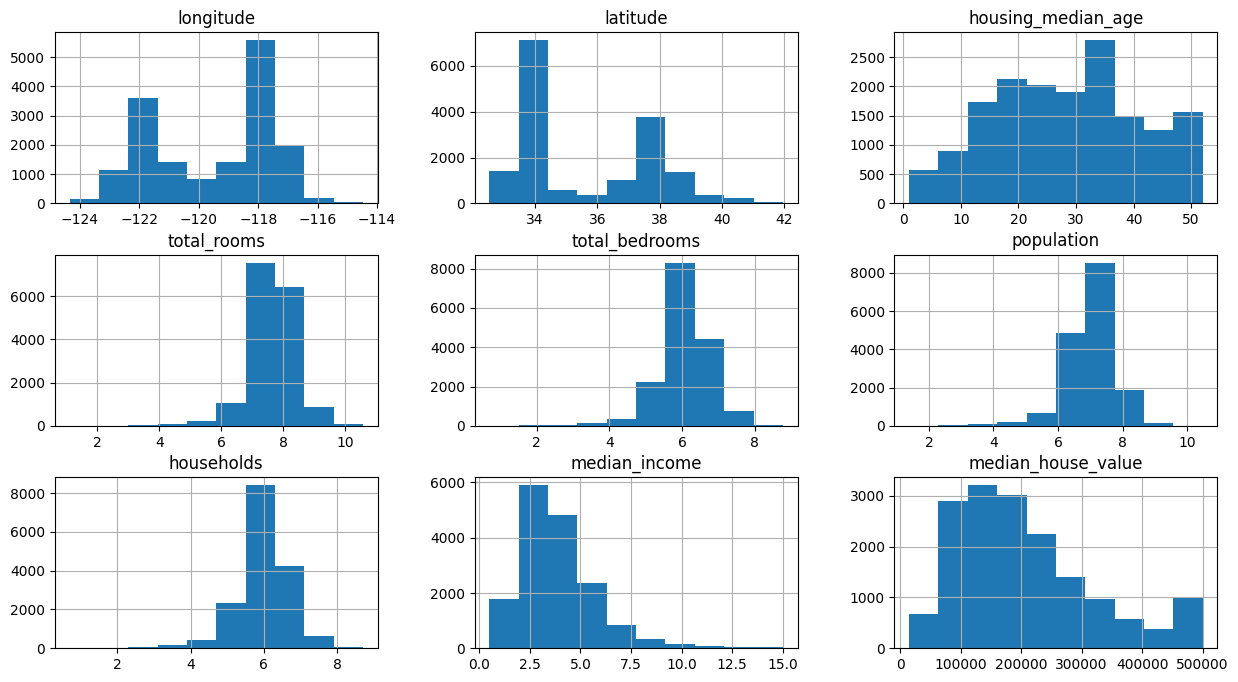

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

train_data.hist(figsize=(15, 8))

<ipython-input-13-a77c419ca12a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


<Axes: >

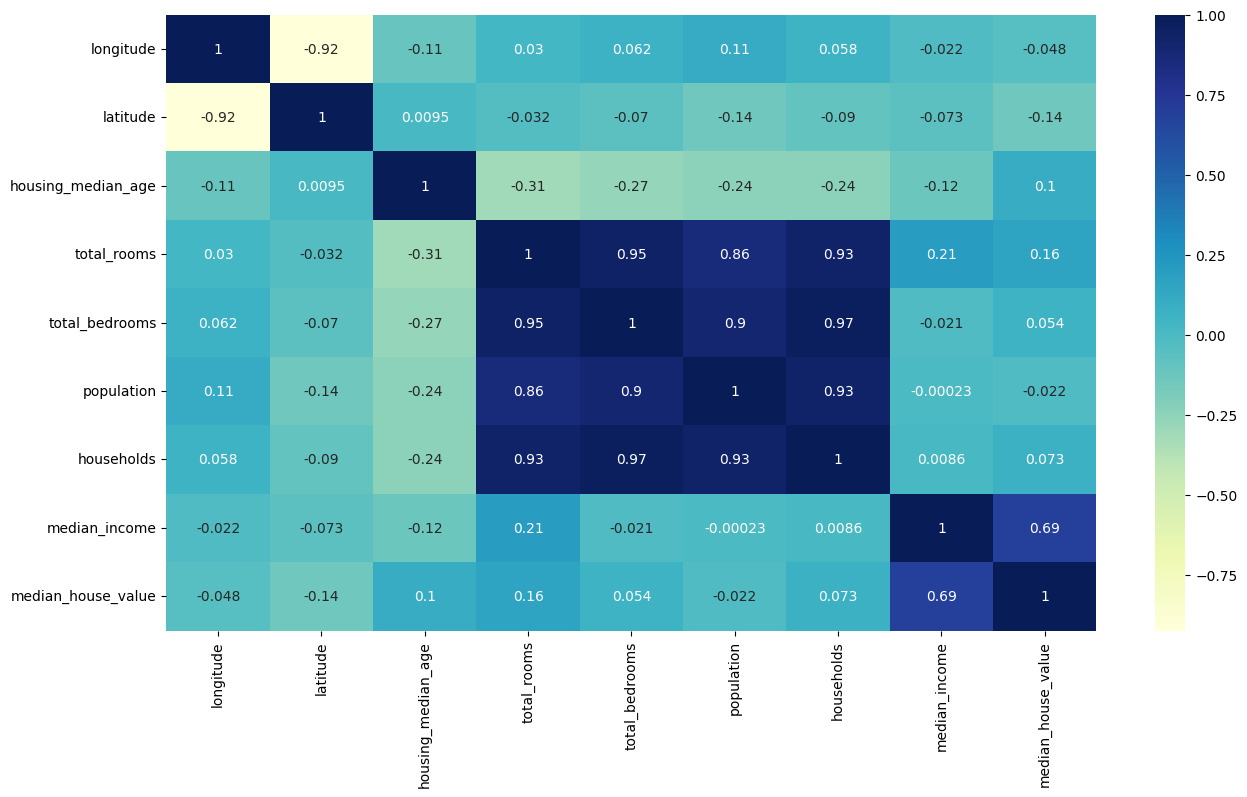

In [13]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [14]:
train_data['ocean_proximity'].value_counts()

<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: ocean_proximity, dtype: int64

In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
# One-hot encoding

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,227600.0,1,0,0,0,0
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,110400.0,0,1,0,0,0
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,248100.0,0,1,0,0,0
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,305600.0,1,0,0,0,0
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,214600.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0


<Axes: >

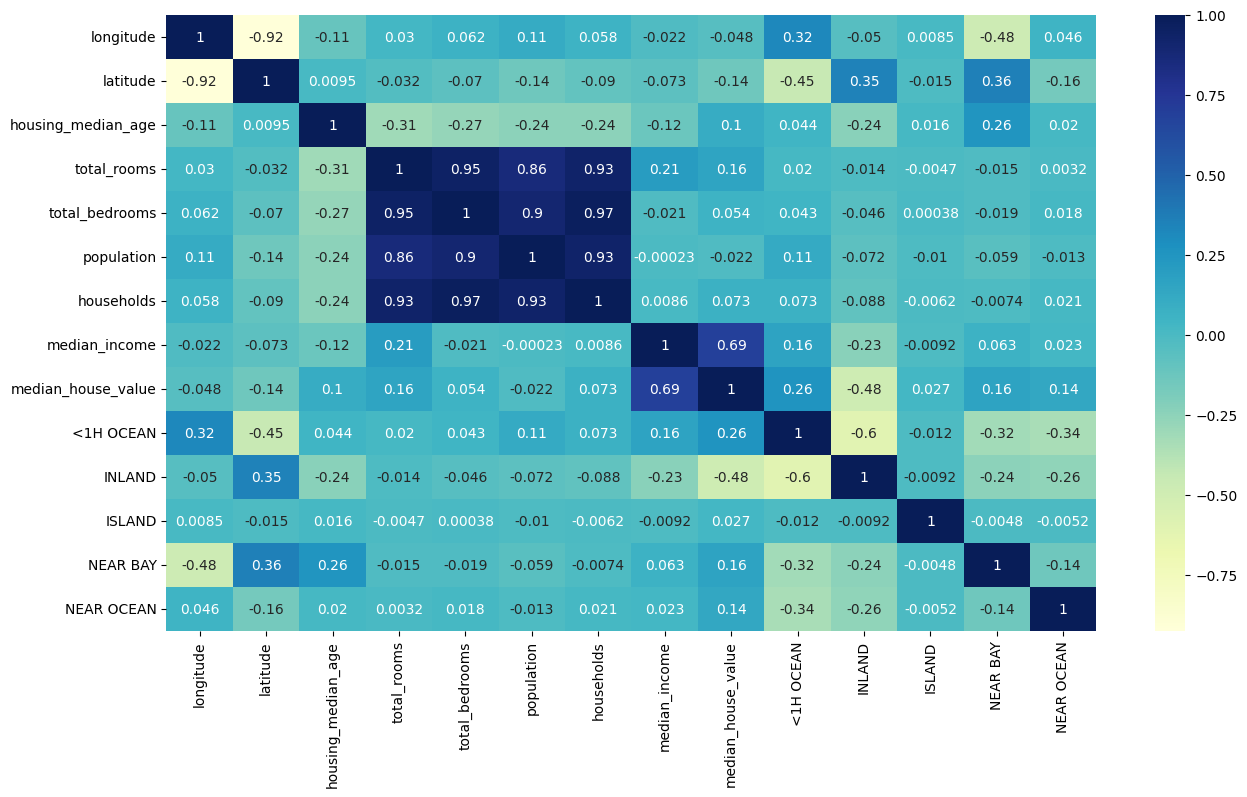

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

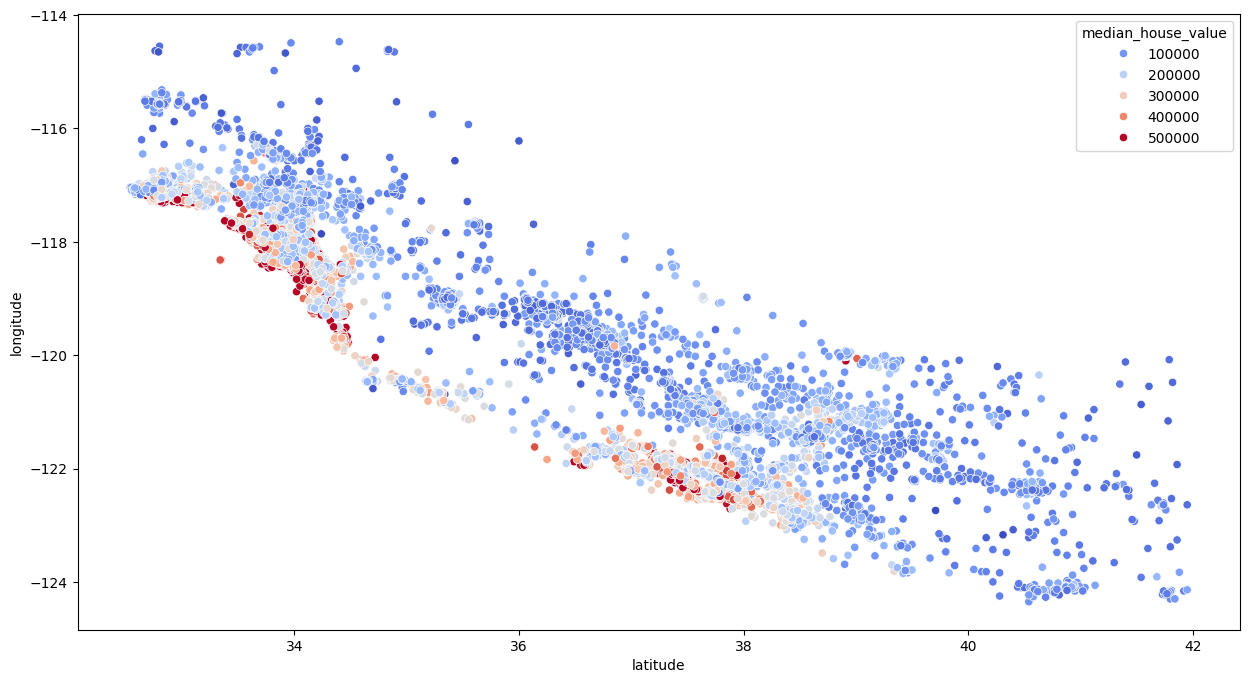

In [18]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [19]:
# Feature engineering
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,227600.0,1,0,0,0,0,0.813816,1.235350
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,110400.0,0,1,0,0,0,0.749416,1.344506
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,248100.0,0,1,0,0,0,0.815812,1.246236
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,305600.0,1,0,0,0,0,0.882690,1.142841
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,214600.0,0,0,0,0,1,0.794652,1.252109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0,0.776717,1.308200
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0,0.800481,1.255281
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0,0.801871,1.251124
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0,0.805704,1.242326


<Axes: >

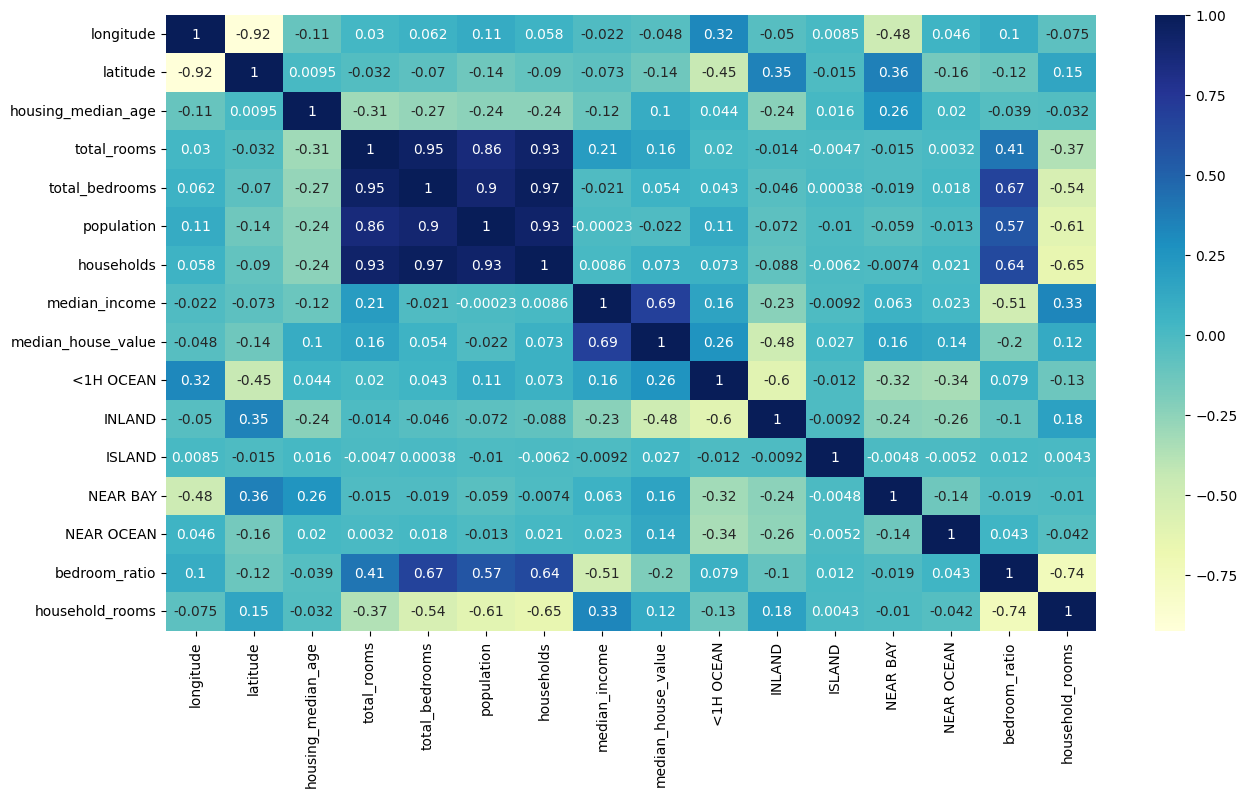

In [21]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [30]:
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [23]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [24]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14416,-117.24,32.79,20.0,6.869014,5.631212,6.265301,5.541264,3.1838,245800.0,0,0,0,0,1,0.819799,1.239612
16383,-121.29,38.01,2.0,8.764678,7.018402,8.110127,6.864848,4.4871,137900.0,0,1,0,0,0,0.800760,1.276748
7731,-118.14,33.92,31.0,8.224700,6.749931,7.746733,6.687109,3.2237,218200.0,1,0,0,0,0,0.820690,1.229934
1410,-122.07,37.94,30.0,7.139660,5.624018,6.562444,5.402677,2.8920,220800.0,0,0,0,1,0,0.787715,1.321504
1335,-121.89,37.99,4.0,7.683404,6.393591,6.834109,6.135565,4.1016,170500.0,0,1,0,0,0,0.832130,1.252273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,-118.15,33.76,36.0,7.978311,6.666957,7.076654,6.620073,3.5985,500001.0,0,0,0,0,1,0.835635,1.205170
6274,-117.95,34.03,33.0,7.486053,5.978886,7.325149,5.932245,3.3389,157900.0,1,0,0,0,0,0.798670,1.261926
2997,-119.03,35.32,12.0,7.909122,6.309918,7.166266,6.261492,2.5575,100200.0,0,1,0,0,0,0.797803,1.263137
13440,-117.42,34.08,28.0,7.741099,6.040255,7.180070,6.098074,3.4844,127700.0,0,1,0,0,0,0.780284,1.269433


In [25]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

x_test = scaler.transform(x_test)

model.score(x_test, y_test)

0.6687407117584969

In [26]:
forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [27]:
forest.score(x_test, y_test)

0.8207981403307092